Biodiversity 
* Analyze some data about species at various national parks.

In [226]:
from matplotlib import pyplot as plt
import pandas as pd

`species_info.csv` includes data about different species in our National Parks:
- The scientific name of each species
- The common names of each species
- The species conservation status

In [227]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


How many different species are in the `species` DataFrame?

In [228]:
print(species.scientific_name.nunique())

5541


What are the different values of `category` in `species`?

In [229]:
print(species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


What are the different values of `conservation_status`?

In [230]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant 
portion of its range

We'd like to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` 
meet each of these criteria.

In [231]:
print(species.groupby("conservation_status").scientific_name.nunique().reset_index())

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2  Species of Concern              151
3          Threatened               10


A small number of species are categorized as needing some sort of protection. The rest have `conservation_status` equal to `None`. Replace `None` with `No Intervention`

In [232]:
species.fillna('No Intervention', inplace=True)

Run the same `groupby` as before to see how many species require `No Intervention`.

In [233]:
species.groupby("conservation_status").scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


Sort the columns by how many species are in each categories.

In [234]:
protection_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')

Create a bar chart

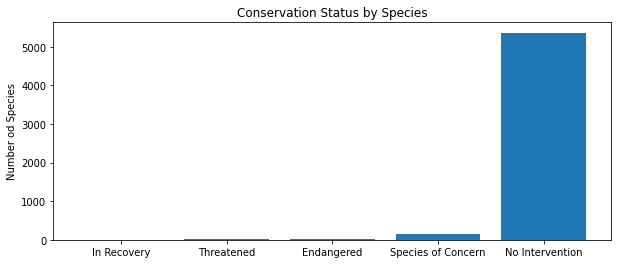

In [235]:
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)), protection_counts.scientific_name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel("Number od Species")
plt.title("Conservation Status by Species")
plt.show()

Are certain types of species more likely to be endangered?

* Create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to 
`No Intervention`, and `False` otherwise.

In [236]:
species["is_protected"] = species.conservation_status != 'No Intervention'
species

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False


Group the `species` data frame by the `category` and `is_protected` columns and count the unique 
`scientific_name`s in each grouping.

In [237]:
category_counts = species.groupby(["category", "is_protected"])["scientific_name"].count().reset_index()
category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,73
1,Amphibian,True,7
2,Bird,False,442
3,Bird,True,79
4,Fish,False,116


Rearange `category_counts`

In [238]:
category_pivot = category_counts.pivot(columns="is_protected", index="category", values="scientific_name").reset_index()
category_pivot

is_protected,category,False,True
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


rename the categories `True` and `False`:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [239]:
category_pivot.rename(columns={False: "not_protected", True: "protected"}, inplace=True)

Create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` divided by `protected` plus `not_protected`.

In [240]:
category_pivot["percent_protected"] = category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)
category_pivot

is_protected,category,not_protected,protected,percent_protected
0,Amphibian,73,7,0.087500
1,Bird,442,79,0.151631
2,Fish,116,11,0.086614
3,Mammal,176,38,0.177570
4,Nonvascular Plant,328,5,0.015015
5,Reptile,74,5,0.063291
6,Vascular Plant,4424,46,0.010291


Conservationists have been recording sightings of different species at several national parks for the past 7 days.  
They've saved their observations in a file called `observations.csv`.

In [241]:
observations = pd.read_csv("observations.csv")
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


Some scientists are studying the number of sheep sightings at different national parks.  There are several different 
scientific names for different types of sheep.

Which rows of `species` are referring to sheep?

Create a new column in `species` called `is_sheep` which is `True` if the 
`common_names` contains `'Sheep'`, and `False` otherwise.

In [242]:
species["is_sheep"] = species.common_names.apply(lambda x: "Sheep" in x)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


Select the rows of `species` where `is_sheep` is `True`

In [243]:
species[species.is_sheep == True]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is 
`Mammal`.  Save the results to the variable `sheep_species`.

In [244]:
sheep_species = species[(species.is_sheep == True) & (species.category == "Mammal")]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as 
`sheep_observations`.

In [245]:
sheep_observations = pd.merge(observations, sheep_species)
sheep_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True


How many total sheep observations (across all three species) were made at each national park?  

Use `groupby` to get the `sum` of `observations` for each `park_name`.  Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park

In [246]:
obs_by_park = sheep_observations.groupby("park_name").observations.sum().reset_index()
print(obs_by_park)

                             park_name  observations
0                  Bryce National Park           250
1  Great Smoky Mountains National Park           149
2            Yellowstone National Park           507
3               Yosemite National Park           282


Bar chart showing the different number of observations at each park.

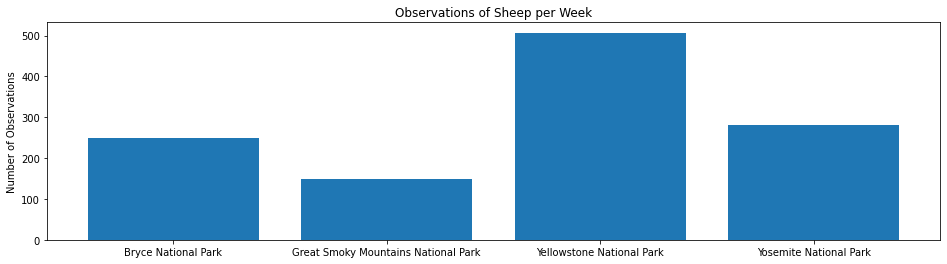

In [247]:
plt.figure(figsize=(16, 4)) 
ax = plt.subplot()
plt.bar(range(len(obs_by_park.observations)), obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park.observations.values)))
ax.set_xticklabels(obs_by_park.park_name)
plt.ylabel("Number of Observations")
plt.title("Observations of Sheep per Week")
plt.show()